This notebook shows how to **create** a **custom vector field**.

# IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

from spomso.cores.helper_functions import generate_grid, smarter_reshape, vector_smarter_reshape
from spomso.cores.vector_modification_functions import batch_normalize
from spomso.cores.geom import VectorField

# PARAMETERS

In [2]:
# size of the volume
co_size = 25, 25, 25
# resolution of the volume
co_resolution = 50, 50, 50

# show 2D cross-section along the z-axis
show_midplane = True
# index of the cross-section along the z-axis
depth_index = co_resolution[2]//2
# 1/decimate of total vectors are shown in the cross-section
decimate = 4

# show a 3D plot
show_3d = True
show_field = True
show_field_3d = True

# COORDINATE SYSTEM

Point cloud of coordinates is created with the **generate_grid** function, which takes the size of the coordinate system and the number of points in each direction (**co_resolution**).

In [3]:
coor, co_res_new = generate_grid(co_size, co_resolution)

If there is an even number of points along any direction the function will automatically convert it to an odd number, therefore the origin is always included in the point cloud. The point cloud is a **numpy.ndarray** with a shape of **(D, N)**, where **D** is the number of dimensions and **N** is the number of data points.

# CREATE VECTOR FIELDS

Define the **custom vector field** as a function:

In [4]:
def custom_radial_vector_field(co_cloud_, order_):
    q = co_cloud_.copy()
    u = np.linalg.norm(q, axis=0, ord=order_)

    dimensions = np.asarray(co_resolution).shape[0]
    ur = smarter_reshape(u, co_resolution)

    vec = np.asarray(np.gradient(ur))
    vec = vec.reshape(dimensions, -1)

    v = batch_normalize(vec)
    return v

in this case the **custom vector field** is a special type of **radial vector field**.
The only parameter is the **order** of the custom vector field.

Create the vector field from the **custom vector field** function and set the **order** parameter to **3**:

In [5]:
final = VectorField(custom_radial_vector_field, 3)

## EVALUATE

Evaluate the **vector field** functions to create a map of the **vector field**. This is done by calling the **create** method and passing in the point cloud of coordinates:

In [6]:
final_field = final.create(coor)

# EXTRACT

Extract the **x**, **y**, and **z** components of the **vector field**:

In [7]:
x = final.x(coor)
y = final.y(coor)
z = final.z(coor)

Extract the **phi** (azimuthal) and **theta** (polar) angles, and the vector **lengths**:

In [8]:
phi = final.phi(coor)
theta = final.theta(coor)
length = final.length(coor)

Convert the field maps into grids:

In [9]:
field = vector_smarter_reshape(final_field, co_resolution)
x = smarter_reshape(x, co_resolution)
y = smarter_reshape(y, co_resolution)
z = smarter_reshape(z, co_resolution)
phi = smarter_reshape(phi, co_resolution)
theta = smarter_reshape(theta, co_resolution)
length = smarter_reshape(length, co_resolution)

# PLOT

## XY plane


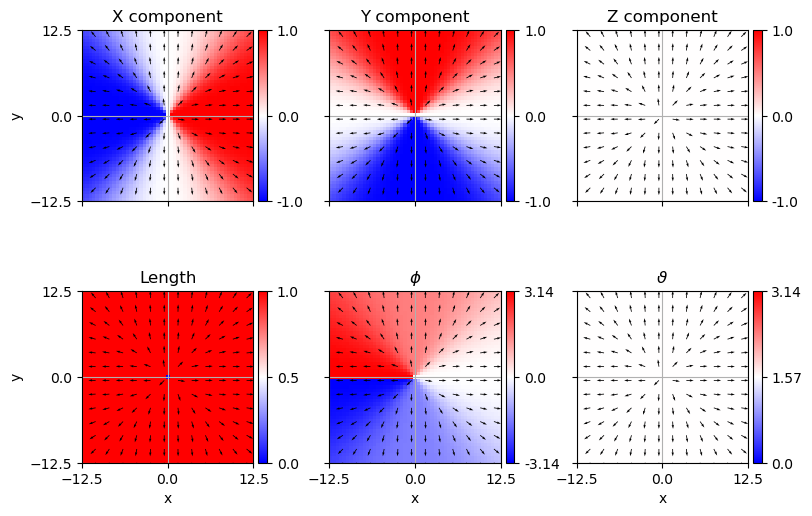

In [10]:
if show_midplane:
    fig, axs = plt.subplots(2, 3, figsize=(8.25, 2*8.25/3), sharex="col", sharey="row")

    patterns = ((x, y, z), (length, phi, theta))
    titles = (("X component", "Y component", "Z component"), ("Length", r"$\phi$", r"$\vartheta$"))
    mins = ((-1, -1, -1), (0, -np.pi, 0))
    maxs = ((1, 1, 1), (1, np.pi, np.pi))

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]

            divider = make_axes_locatable(ax)
            cax = divider.append_axes('right', size='5%', pad=0.05)

            f = ax.imshow(patterns[i][j][:, :, depth_index].T,
                          cmap="bwr",
                          extent=(-co_size[0]/2, co_size[0]/2,
                                  -co_size[1]/2, co_size[1]/2),
                          origin="lower",
                          vmin=mins[i][j],
                          vmax=maxs[i][j]
                      )

            cbar = fig.colorbar(f, cax=cax)
            cbar.set_ticks(np.linspace(mins[i][j], maxs[i][j], 3))
            cbar.set_ticklabels(np.round(np.linspace(mins[i][j], maxs[i][j], 3), 2))

            ax.set_xticks(np.linspace(-co_size[0]/2, co_size[0]/2, 3))
            ax.set_yticks(np.linspace(-co_size[1]/2, co_size[1]/2, 3))
            ax.grid()

            ax.quiver(smarter_reshape(coor[0], co_resolution)[::decimate, ::decimate, depth_index],
                      smarter_reshape(coor[1], co_resolution)[::decimate, ::decimate, depth_index],
                      field[0, ::decimate, ::decimate, depth_index],
                      field[1, ::decimate, ::decimate, depth_index])

            if i == 1:
                ax.set_xlabel("x")
            if j == 0:
                ax.set_ylabel("y")

            ax.set_title(titles[i][j])

    fig.tight_layout()
    fig.subplots_adjust(left=0.112,
                        bottom=0.05,
                        right=0.936,
                        top=1,
                        wspace=0.336,
                        hspace=0.0)
    plt.show()

## XZ plane

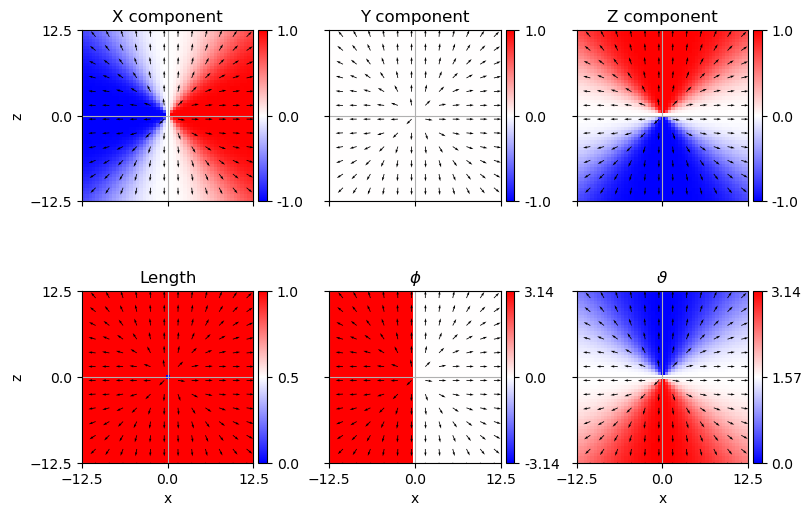

In [11]:
if show_midplane:
    fig, axs = plt.subplots(2, 3, figsize=(8.25, 2*8.25/3), sharex="col", sharey="row")

    patterns = ((x, y, z), (length, phi, theta))
    titles = (("X component", "Y component", "Z component"), ("Length", r"$\phi$", r"$\vartheta$"))
    mins = ((-1, -1, -1), (0, -np.pi, 0))
    maxs = ((1, 1, 1), (1, np.pi, np.pi))

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]

            divider = make_axes_locatable(ax)
            cax = divider.append_axes('right', size='5%', pad=0.05)
            depth_index_xz = patterns[i][j].shape[1]//2
            f = ax.imshow(patterns[i][j][:, depth_index_xz, :].T,
                      cmap="bwr",
                      extent=(-co_size[0]/2, co_size[0]/2,
                              -co_size[2]/2, co_size[2]/2),
                      origin="lower",
                          vmin=mins[i][j],
                          vmax=maxs[i][j]
                      )

            cbar = fig.colorbar(f, cax=cax)
            cbar.set_ticks(np.linspace(mins[i][j], maxs[i][j], 3))
            cbar.set_ticklabels(np.round(np.linspace(mins[i][j], maxs[i][j], 3), 2))

            ax.set_xticks(np.linspace(-co_size[0]/2, co_size[0]/2, 3))
            ax.set_yticks(np.linspace(-co_size[2]/2, co_size[2]/2, 3))
            ax.grid()

            ax.quiver(smarter_reshape(coor[0], co_resolution)[::decimate, depth_index, ::decimate],
                      smarter_reshape(coor[2], co_resolution)[::decimate, depth_index, ::decimate],
                      field[0, ::decimate, depth_index, ::decimate],
                      field[2, ::decimate, depth_index, ::decimate])

            if i == 1:
                ax.set_xlabel("x")
            if j == 0:
                ax.set_ylabel("z")

            ax.set_title(titles[i][j])

    fig.tight_layout()
    fig.subplots_adjust(left=0.112,
                        bottom=0.05,
                        right=0.936,
                        top=1,
                        wspace=0.336,
                        hspace=0.0)
    plt.show()

## 3D

In [ ]:
if show_3d:
    decimate3d = 2*decimate
    xx = smarter_reshape(coor[0], co_resolution)[::decimate3d, ::decimate3d, :].flatten()
    yy = smarter_reshape(coor[1], co_resolution)[::decimate3d, ::decimate3d, :].flatten()
    zz = smarter_reshape(coor[2], co_resolution)[::decimate3d, ::decimate3d, :].flatten()
    vx = field[0, ::decimate3d, ::decimate3d, :].flatten()
    vy = field[1, ::decimate3d, ::decimate3d, :].flatten()
    vz = field[2, ::decimate3d, ::decimate3d, :].flatten()
    phi_ = phi[::decimate3d, ::decimate3d, :].flatten()

    fig = go.Figure()

    fig = go.Figure(
        data=go.Cone(
            x=xx,
            y=yy,
            z=zz,
            u=vx,
            v=vy,
            w=vz,
            colorscale='Blues_r',
            sizemode="absolute",
            sizeref=3
        )
    )

    fig.update_layout(
        scene=dict(
            aspectmode="manual",
            aspectratio=dict(x=1, y=co_size[1]/co_size[0], z=co_size[2]/co_size[0])
        )
    )

    fig.show()